<a href="https://colab.research.google.com/github/KamonohashiPerry/MachineLearning/blob/master/deep-learning-from-scratch-2/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 自然言語処理とは

### 単語の意味
単語の意味を捉える方法
+ シソーラス
+ カウントベース
+ 推論ベース

### シソーラス
類語辞書

#### WordNet
#### シソーラスの問題点


### カウントベースの手法
自然言語処理の研究やアプリケーションのために目的をもって収集されたテキストデータのことをコーパスと呼ぶ

### Pythonによるコーパスの下準備



In [1]:
text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [2]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [0]:
# import re

# text = 'You say goodbye and I say hello.'
# text = text.lower()

# words = re.split('(\W+)?', text)
# words

In [0]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [5]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [6]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [7]:
id_to_word[1]

'say'

In [8]:
word_to_id['hello']

5

In [9]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [0]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

In [0]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [12]:
display(corpus)
display(word_to_id)
display(id_to_word)

array([0, 1, 2, 3, 4, 1, 5, 6])

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

### 単語の分散表現
単語を固定長のベクトルで表現

### 分布仮説
単語の意味は周囲の単語によって形成される

### 共起行列

In [0]:
C = np.array([
              [0, 1, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 1, 1, 0],
              [0, 1, 0, 1, 0, 0, 0],
              [0, 0, 1, 0, 1, 0, 0],
              [0, 1, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 0]
], dtype=np.int32)

In [14]:
print(C[0])

[0 1 0 0 0 0 0]


In [15]:
print(C[4])

[0 1 0 1 0 0 0]


In [16]:
print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]


In [0]:
def create_co_matrix(corpus, vacab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix

### ベクトル間の類似度
+ コサイン類似度

In [0]:
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x**2)) # xの正規化
  ny = y / np.sqrt(np.sum(y**2)) # yの正規化
  return np.dot(nx, ny)

In [0]:
# ゼロ割を克服する方法
def cos_similarity(x, y, eps=1e-8):
  nx = x / (np.sqrt(np.sum(x**2)) + eps)
  ny = y / (np.sqrt(np.sum(y**2)) + eps)
  return np.dot(nx, ny)

In [20]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


### 類似単語のランキング表示

In [0]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  # STEP1 クエリを取り出す
  if query not in word_to_id:
    print('%s is not found' % query)
    return

  print('\n[query] ' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  # STEP2 コサイン類似度の算出
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)

  # STEP3 コサイン類似度の結果から、その値を高い順に出力
  count = 0
  for i in (-1 * similarity).argsort():
    if id_to_word[i] == query:
      continue
    print(' %s: %s' % (id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

In [22]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

In [23]:
(-x).argsort()

array([0, 2, 1])

In [24]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


## カウントベースの手法の改善

### 相互情報量
+ Pointwise Mutual Information(PMI)

$$ PMI(x, y) = log_2 \frac{P(x, y)}{P(x)P(y)} = log_2 \frac{ \frac{C(x,y)}{N} }{\frac{C(x)}{N} \frac{C(y)}{N} } = log_2 \frac{C(x,y)  N }{C(x)C(y)} $$


共起回数が0の場合、
$$log_2 = - \infty$$
となるので、実践上では正の相互情報量が使われる。

$$PPMI(x, y) = max(0, PMI(x,y))$$

In [0]:
def ppmi(C, verbose=False, eps=1e-8):
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)
  total = C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j]*N / (S[j]*S[i])+ eps)
      M[i, j] = max(0, pmi)

      if verbose:
        cnt += 1
        if cnt % (total//100) ==0:
          print('%.1f%% done' % (100*cnt/total))
  return M

In [26]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 有効桁3桁で表示
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


### 次元削減

特異値分解（Singular Value Decomposition:
SVD）

$$X=USV^T$$
UとVは直行行列  
Sは対角行列(対角成分に特異値があり、大きい順に並んでいる)

### SVDによる時限削減

In [0]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [28]:
print(C[0]) # 共起行列
print(W[0]) # PPMI行列
print(U[0]) # SVD

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


In [29]:
print(U[0, :2])

[0.341 0.   ]


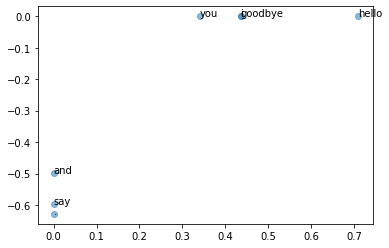

In [30]:
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

### PTBデータセット
+ Penn Treebank

In [0]:
import sys
import os
sys.path.append('..')
try:
    import urllib.request
except ImportError:
    raise ImportError('Use Python3!')
import pickle
import numpy as np


url_base = 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/'
key_file = {
    'train':'ptb.train.txt',
    'test':'ptb.test.txt',
    'valid':'ptb.valid.txt'
}
save_file = {
    'train':'ptb.train.npy',
    'test':'ptb.test.npy',
    'valid':'ptb.valid.npy'
}
vocab_file = 'ptb.vocab.pkl'

dataset_dir = os.path.dirname(os.path.abspath('/content'))

def _download(file_name):
    file_path = dataset_dir + '/' + file_name
    if os.path.exists(file_path):
        return

    print('Downloading ' + file_name + ' ... ')

    try:
        urllib.request.urlretrieve(url_base + file_name, file_path)
    except urllib.error.URLError:
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context
        urllib.request.urlretrieve(url_base + file_name, file_path)

    print('Done')

def load_vocab():
    vocab_path = dataset_dir + '/' + vocab_file

    if os.path.exists(vocab_path):
        with open(vocab_path, 'rb') as f:
            word_to_id, id_to_word = pickle.load(f)
        return word_to_id, id_to_word

    word_to_id = {}
    id_to_word = {}
    data_type = 'train'
    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name

    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()

    for i, word in enumerate(words):
        if word not in word_to_id:
            tmp_id = len(word_to_id)
            word_to_id[word] = tmp_id
            id_to_word[tmp_id] = word

    with open(vocab_path, 'wb') as f:
        pickle.dump((word_to_id, id_to_word), f)

    return word_to_id, id_to_word



def load_data(data_type='train'):
    '''
        :param data_type: データの種類：'train' or 'test' or 'valid (val)'
        :return:
    '''
    if data_type == 'val': data_type = 'valid'
    save_path = dataset_dir + '/' + save_file[data_type]

    word_to_id, id_to_word = load_vocab()

    if os.path.exists(save_path):
        corpus = np.load(save_path)
        return corpus, word_to_id, id_to_word

    file_name = key_file[data_type]
    file_path = dataset_dir + '/' + file_name
    _download(file_name)

    words = open(file_path).read().replace('\n', '<eos>').strip().split()
    corpus = np.array([word_to_id[w] for w in words])

    np.save(save_path, corpus)
    return corpus, word_to_id, id_to_word

In [32]:
dataset_dir

'/'

In [33]:
corpus, word_to_id, id_to_word = load_data('train')

Done


In [34]:
print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]', id_to_word[0])
print('id_to_word[1]', id_to_word[1])
print('id_to_word[2]', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] aer
id_to_word[1] banknote
id_to_word[2] berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


### PTBデータセットでの評価

In [0]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = load_data('train')
vocab_size = len(word_to_id)
print('counting co-occurrence ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculationg PPMI ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
  # truncated SVD (fast!)
  from sklearn.utils.extmath import randomized_svd
  U, S, V = randomized_svd(W, n_components=wordvec_size,n_iter=5,
                              random_state=None)
except ImportError:
  # SVD (slow)
  U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

In [36]:
querys = ['you', 'year', 'car', 'toyota']

for query in querys:
  most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6187642216682434
 do: 0.6072410941123962
 we: 0.6007590293884277
 anybody: 0.5636523365974426
 someone: 0.5413199067115784

[query] year
 quarter: 0.6891342401504517
 month: 0.654195249080658
 third: 0.6419187188148499
 last: 0.5998150110244751
 fourth: 0.5927937626838684

[query] car
 auto: 0.6366668939590454
 luxury: 0.577726423740387
 truck: 0.5174813866615295
 corsica: 0.5040563344955444
 cars: 0.4735107719898224

[query] toyota
 motor: 0.7181301116943359
 motors: 0.6990996599197388
 nissan: 0.6795780062675476
 lexus: 0.6106011867523193
 honda: 0.5606324672698975
